# **Step 1: Exploratory Data Analysis (EDA)**
Objective: Understand the dataset, its distribution, and text patterns.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [25]:
print(df.shape)

(12120, 6)


In [26]:
df.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [27]:
# Check for missing values
print(df.isnull().sum())

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64


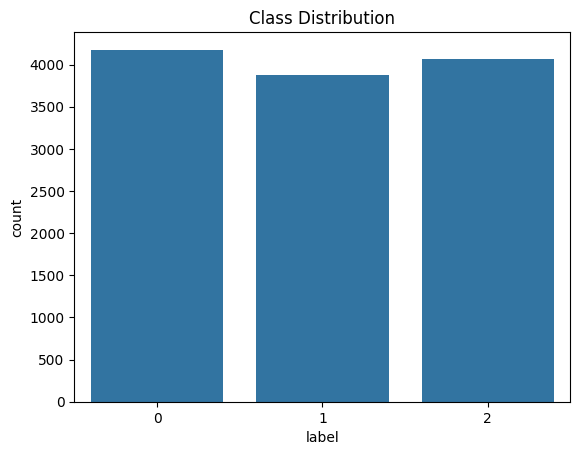

In [28]:
# Class distribution
sns.countplot(x="label", data=df)
plt.title("Class Distribution")
plt.show()

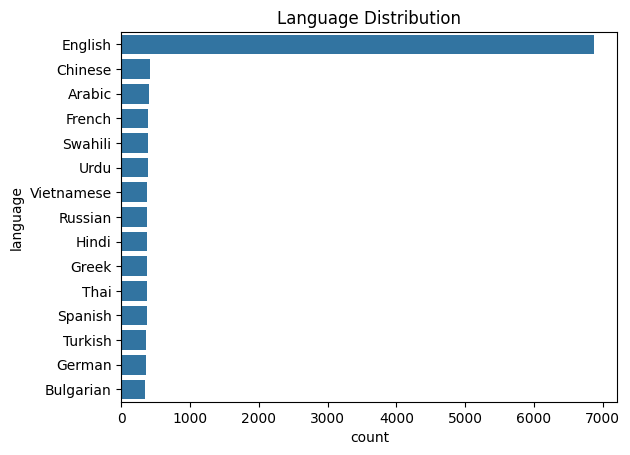

In [29]:
# Language distribution
sns.countplot(y="language", data=df, order=df["language"].value_counts().index)
plt.title("Language Distribution")
plt.show()

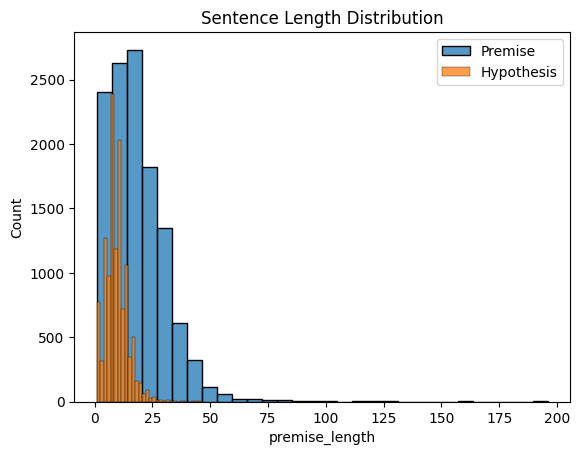

In [30]:
# Sentence length analysis
df["premise_length"] = df["premise"].apply(lambda x: len(x.split()))
df["hypothesis_length"] = df["hypothesis"].apply(lambda x: len(x.split()))
sns.histplot(df["premise_length"], bins=30, label="Premise")
sns.histplot(df["hypothesis_length"], bins=30, label="Hypothesis")
plt.legend()
plt.title("Sentence Length Distribution")
plt.show()

# **Step 2: Text Preprocessing**
Objective: Clean and transform text for model training.

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Download NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [34]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Tokenize
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

In [35]:
# Apply preprocessing
df["premise_cleaned"] = df["premise"].apply(preprocess_text)
df["hypothesis_cleaned"] = df["hypothesis"].apply(preprocess_text)

In [36]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
premise_tfidf = tfidf.fit_transform(df["premise_cleaned"])
hypothesis_tfidf = tfidf.transform(df["hypothesis_cleaned"])

# **Step 3: Model Creation**
Objective: Train machine learning models to classify sentence relationships.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Split dataset
X = pd.concat([pd.DataFrame(premise_tfidf.toarray()), pd.DataFrame(hypothesis_tfidf.toarray())], axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Baseline Model: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.29      0.36      0.32       851
           1       0.27      0.22      0.24       773
           2       0.31      0.29      0.30       800

    accuracy                           0.29      2424
   macro avg       0.29      0.29      0.29      2424
weighted avg       0.29      0.29      0.29      2424



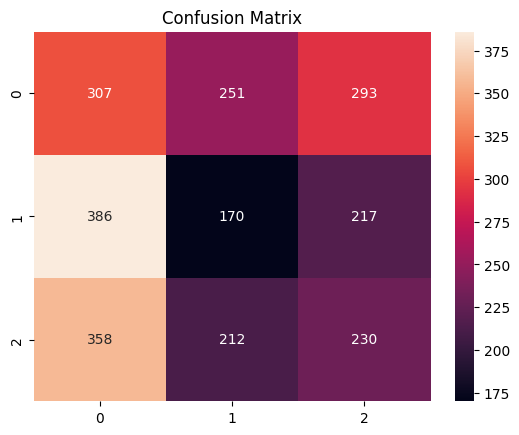

In [40]:
# Evaluate
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

# **Step 4: Model Evaluation**
Objective: Measure model performance using classification metrics.

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

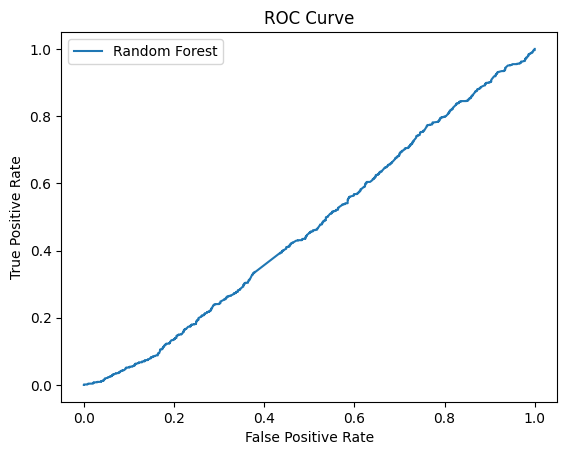

In [42]:
# AUC-ROC Curve
y_proba = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Step 5: Model Tuning and Optimization**
Objective: Improve model performance through tuning.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [48]:
# Define parameter distribution
param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": randint(2, 10)
}

In [50]:
# RandomizedSearchCV for Random Forest
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=5, cv=2, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 131}


# **Step 6: Neural Networks - Custom ANN**
Objective: Implement a custom Artificial Neural Network (ANN) using TensorFlow/Keras.

**6.1 Data Preparation**
Before building the ANN, we need to prepare the data in a format suitable for neural networks.

In [56]:
import tensorflow as tf

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# Combine premise and hypothesis for TF-IDF
df["combined_text"] = df["premise_cleaned"] + " " + df["hypothesis_cleaned"]

In [53]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["combined_text"]).toarray()
y = df["label"]

In [54]:
# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [57]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

**6.2 Build the ANN Model**

We’ll create a simple feedforward neural network with:

* An input layer (size depends on the TF-IDF features).

* One or more hidden layers with activation functions (e.g., ReLU).

* An output layer with a softmax activation function for multi-class classification.




In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [59]:
# Define the ANN model
model = Sequential()

In [60]:
# Input layer
model.add(Dense(512, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dropout(0.5))  # Dropout for regularization

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# Hidden layers
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))


In [62]:
# Output layer
model.add(Dense(3, activation="softmax"))  # 3 classes: Contradiction, Neutral, Entailment

In [63]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [64]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,725,123 (10.40 MB)

 Trainable params: 2,725,123 (10.40 MB)

 Non-trainable params: 0 (0.00 B)

**6.3 Train the ANN Model**

In [65]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.3290 - loss: 1.0997 - val_accuracy: 0.3284 - val_loss: 1.0996
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3762 - loss: 1.0927 - val_accuracy: 0.3010 - val_loss: 1.1083
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.4980 - loss: 1.0175 - val_accuracy: 0.2964 - val_loss: 1.1474
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.6432 - loss: 0.8507 - val_accuracy: 0.2809 - val_loss: 1.3246
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.7247 - loss: 0.6589 - val_accuracy: 0.2758 - val_loss: 1.6209
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7818 - loss: 0.5294 - val_accuracy: 0.2794 - val_loss: 1.9382
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8339 - loss: 0.4152 - val_accuracy: 0.2814 - val_loss: 2.1784
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8532 - loss: 0.3465 - val_

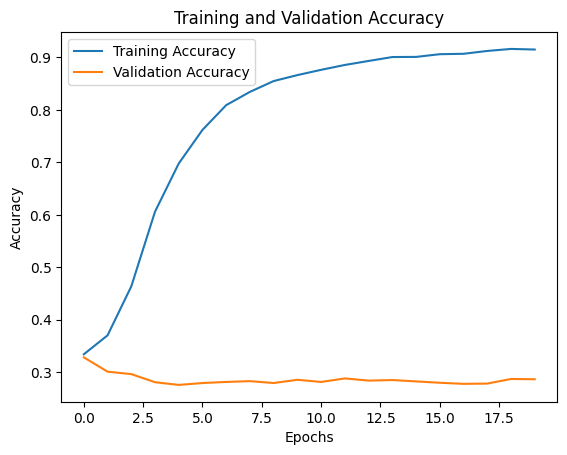

In [66]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

**6.4 Evaluate the ANN Model**

In [67]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2560 - loss: 4.6143
Test Accuracy: 0.2578


In [68]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [69]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes, target_names=["Contradiction", "Neutral", "Entailment"]))

               precision    recall  f1-score   support

Contradiction       0.26      0.24      0.25       851
      Neutral       0.25      0.27      0.26       773
   Entailment       0.26      0.27      0.26       800

     accuracy                           0.26      2424
    macro avg       0.26      0.26      0.26      2424
 weighted avg       0.26      0.26      0.26      2424



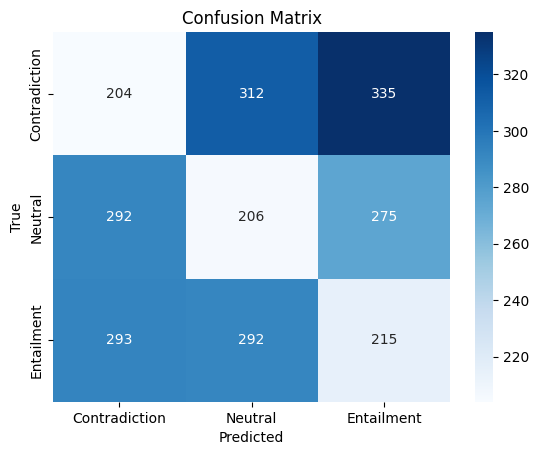

In [70]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Contradiction", "Neutral", "Entailment"], yticklabels=["Contradiction", "Neutral", "Entailment"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**6.5 Hyperparameter Tuning for ANN**

To optimize the ANN, we can tune hyperparameters like:

Number of hidden layers and units.

* Dropout rate.

* Learning rate.

* Batch size.

* Number of epochs.

We’ll use Keras Tuner or Optuna for efficient hyperparameter tuning.

In [71]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [72]:
from kerastuner.tuners import RandomSearch

<ipython-input-72-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [73]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int("units_input", min_value=128, max_value=512, step=64), input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dropout(rate=hp.Float("dropout_input", min_value=0.3, max_value=0.7, step=0.1)))

    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(Dense(units=hp.Int(f"units_{i}", min_value=64, max_value=256, step=64), activation="relu"))
        model.add(Dropout(rate=hp.Float(f"dropout_{i}", min_value=0.3, max_value=0.7, step=0.1)))

    model.add(Dense(3, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    directory="ann_tuning",
    project_name="sentence_classification"
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Trial 10 Complete [00h 03m 17s]
val_accuracy: 0.3329896926879883

Best val_accuracy So Far: 0.3329896926879883
Total elapsed time: 00h 30m 56s


In [74]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# **Advanced LSTM Models**


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["premise_cleaned"] + " " + df["hypothesis_cleaned"])

X_premise = tokenizer.texts_to_sequences(df["premise_cleaned"])
X_hypothesis = tokenizer.texts_to_sequences(df["hypothesis_cleaned"])
X_combined = [a + b for a, b in zip(X_premise, X_hypothesis)]  # Combine premise and hypothesis

X_combined = pad_sequences(X_combined, maxlen=100)  # Pad sequences to a fixed length
y = tf.keras.utils.to_categorical(df["label"], num_classes=3)  # One-hot encode labels

In [77]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [78]:
# Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))  # 3 classes: Contradiction, Neutral, Entailment

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 60s 423ms/step - accuracy: 0.3290 - loss: 1.1000 - val_accuracy: 0.3351 - val_loss: 1.0981
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 87s 461ms/step - accuracy: 0.3741 - loss: 1.0938 - val_accuracy: 0.3768 - val_loss: 1.0921
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 77s 419ms/step - accuracy: 0.5234 - loss: 0.9890 - val_accuracy: 0.3552 - val_loss: 1.1427
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 81s 409ms/step - accuracy: 0.6567 - loss: 0.8003 - val_accuracy: 0.3598 - val_loss: 1.3309
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 83s 420ms/step - accuracy: 0.7296 - loss: 0.6318 - val_accuracy: 0.3418 - val_loss: 1.5373
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 51s 419ms/step - accuracy: 0.7901 - loss: 0.5010 - val_accuracy: 0.3567 - val_loss: 2.0708
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.8239 - loss: 0.4038 - val_accuracy: 0.3407 - val_loss: 2.2689
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 84s 436ms/step - accuracy: 0.8435 - loss: 0

In [80]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3099 - loss: 3.6324
Test Accuracy: 0.3218


# **XLM-RoBERTa (XLM-R)**

In [134]:
pip install transformers tensorflow datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.8 MB/s eta 0:00:00


In [142]:
from transformers import XLMRobertaTokenizer, TFXLMRobertaForSequenceClassification
from tensorflow.keras.optimizers.legacy import Adam

In [136]:
# Load XLM-R tokenizer and model
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
model = TFXLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFXLMRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFXLMRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [137]:
# Split the data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [138]:
# Tokenize the premise and hypothesis pairs
def encode_sentences(premise, hypothesis, labels, max_length=128):
    inputs = tokenizer(
        premise.tolist(),
        hypothesis.tolist(),
        return_tensors="tf",
        max_length=max_length,
        truncation=True,
        padding="max_length"
    )
    inputs["labels"] = tf.convert_to_tensor(labels.tolist())
    return inputs

In [139]:
# Encode the datasets
X_train_bert = encode_sentences(train_df["premise"], train_df["hypothesis"], train_df["label"])
X_val_bert = encode_sentences(val_df["premise"], val_df["hypothesis"], val_df["label"])
X_test_bert = encode_sentences(test_df["premise"], test_df["hypothesis"], test_df["label"])

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
# Train the model
history = model.fit(
    dict(X_train_bert),  # Convert inputs to a dictionary
    train_df["label"].tolist(),
    epochs=3,
    batch_size=16,
    validation_data=(dict(X_val_bert), val_df["label"].tolist())
)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(dict(X_test_bert), test_df["label"].tolist())
print(f"Test Accuracy: {accuracy:.4f}")